# Subject: Data Science Foundation

## Session 13 - Correlation in Python.

### Assignment 1 -  Calculating Correlation for pandas Dataframe "Titanic"


- Considering the Correlation analysis presented in Demo 1 develop a new one for the data set “Titanic”. 
- Select the variables most appropriate and justify your option.
- Commit scripts in your GitHub account. You should export your your solution code (.ipynb notebook) and push it to your repository “DataScienceFoundations”.
- The following are the tasks that should complete and synchronize with your repository “DataScienceFoundations” until November 23. Please notice that this task will not be graded, however it’s important that you correctly understand and complete them in order to be sure that you won’t have problems with further assignments.

Guidelines:
- Clone the Git repository to get an initial code: 
https://github.com/FGutierresBTS/BTS_MasterInBigData.git
- Once you downloaded the repository to your local file system, go to the folder “BTS_MasterInBigData/ Session_13_DSF”. 
- Copy the folder “Session_13_DSF” into your local folder “DataScienceFoundations”. 
- In the folder “Session_13_DSF” you will see the files called: 
    -	BTS_DataScienceFoundations_Session13_Correlation_Individual_assignment.ipynb.
    -   "1_titanic_dataset.csv" (note: this dataset must be pre-processed).
- Import these files into Jupyter Notebook using the “Upload” button. 
- Open the imported script and put your code inside the notebook. 
- Export your Assignment *.ipynb notebook and push it to your repository “DataScienceFoundations”.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

df=pd.read_csv("/Users/francobonifetto/Documents/BTS/Data Science Foundations/Session_2 (Iliana)/2_titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum() #check if there is any data missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df['Age'].describe() #using this input, we will know how the data is.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
#Let's replace the missing values for random ones between the 1Q and 3Q

Age = np.where(df["Age"].isnull(),    # Logical check
                       random.randint(20,38), # Value if check is true to be replaced be random values between 1Q & 3Q
                       df["Age"])             # Value if check is false
df["Age"] = Age 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum() #now we have no missing values for Age.

0

In [6]:
df['Age'].describe() # As we can see, the addition of missing values with random ones between the 1Q&3Q has not affected the description of Age

count    891.000000
mean      30.354848
std       13.068621
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
#Let's replace the missing values in column cabin in order to have Nan as 0 and assigned seats as 1

new_cabin = np.where(df["Cabin"].isnull(),    # Logical check
                       0,               # Value if check is true to be replaced by 0
                       1)       # Value if check is false
df["Cabin"] = new_cabin 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


Let transform the column 'Embark' to se if different ports changed the fate of people (maybe because the last ones were nearer to a lifeboat?)

In [8]:
def convertionE (row):
   if row['Embarked'] == 'C' :
      return 1
   if row['Embarked'] == 'S' :
      return 2
   if row['Embarked'] == 'Q' :
      return 3

In [9]:
df['Embarked'] = df.apply (lambda row: convertionE (row),axis=1)

In [10]:
def convertionS (row):
   if row['Sex'] == 'male' :
      return 1
   if row['Sex'] == 'female' :
      return 0

In [11]:
df['Sex'] = df.apply (lambda row: convertionS (row),axis=1)

In [12]:
def convertionU18 (row):
   if row['Age'] >= 18:
      return 0
   if row['Age'] < 18:
      return 1

In [13]:
df['under18'] = df.apply (lambda row: convertionU18 (row),axis=1)

In [14]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,under18
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,0,2.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,1,1.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,0,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,1,2.0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,0,2.0,0
5,6,0,3,"Moran, Mr. James",1,33.00,0,0,330877,8.4583,0,3.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00,0,0,17463,51.8625,1,2.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,349909,21.0750,0,2.0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00,0,2,347742,11.1333,0,2.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00,1,0,237736,30.0708,0,1.0,1


In [15]:
df.drop(['PassengerId'], axis=1).corr(method='spearman')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,under18
Survived,1.000000,-0.339668,-0.543351,-0.055107,0.088879,0.138266,0.323736,0.316912,-0.132222,0.122239
Pclass,-0.339668,1.000000,0.135775,-0.285838,-0.043019,-0.022801,-0.688032,-0.683291,0.292260,0.122231
Sex,-0.543351,0.135775,1.000000,0.075343,-0.195204,-0.254512,-0.259593,-0.140391,0.028915,-0.107150
Age,-0.055107,-0.285838,0.075343,1.000000,-0.150253,-0.217064,0.097534,0.208984,-0.002302,-0.579381
SibSp,0.088879,-0.043019,-0.195204,-0.150253,1.000000,0.450014,0.447113,0.052421,-0.035370,0.290078
Parch,0.138266,-0.022801,-0.254512,-0.217064,0.450014,1.000000,0.410074,0.080353,-0.068136,0.420315
Fare,0.323736,-0.688032,-0.259593,0.097534,0.447113,0.410074,1.000000,0.539300,-0.279971,0.123705
Cabin,0.316912,-0.683291,-0.140391,0.208984,0.052421,0.080353,0.539300,1.000000,-0.232313,-0.055162
Embarked,-0.132222,0.292260,0.028915,-0.002302,-0.035370,-0.068136,-0.279971,-0.232313,1.000000,-0.034957
under18,0.122239,0.122231,-0.107150,-0.579381,0.290078,0.420315,0.123705,-0.055162,-0.034957,1.000000


In [16]:
df.drop(['PassengerId'], axis=1).corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,under18
Survived,1.0,-0.34,-0.54,-0.055,0.089,0.14,0.32,0.32,-0.13,0.12
Pclass,-0.34,1.0,0.14,-0.29,-0.043,-0.023,-0.69,-0.68,0.29,0.12
Sex,-0.54,0.14,1.0,0.075,-0.2,-0.25,-0.26,-0.14,0.029,-0.11
Age,-0.055,-0.29,0.075,1.0,-0.15,-0.22,0.098,0.21,-0.0023,-0.58
SibSp,0.089,-0.043,-0.2,-0.15,1.0,0.45,0.45,0.052,-0.035,0.29
Parch,0.14,-0.023,-0.25,-0.22,0.45,1.0,0.41,0.08,-0.068,0.42
Fare,0.32,-0.69,-0.26,0.098,0.45,0.41,1.0,0.54,-0.28,0.12
Cabin,0.32,-0.68,-0.14,0.21,0.052,0.08,0.54,1.0,-0.23,-0.055
Embarked,-0.13,0.29,0.029,-0.0023,-0.035,-0.068,-0.28,-0.23,1.0,-0.035
under18,0.12,0.12,-0.11,-0.58,0.29,0.42,0.12,-0.055,-0.035,1.0


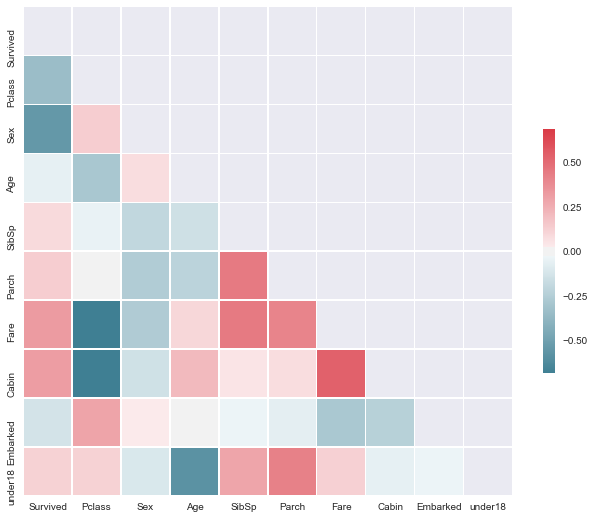

In [17]:
# Compute the correlation matrix

corr = df.drop(['PassengerId'], axis=1).corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Conclusion: 

Contemplating this correlation map, the highest correlations are:
- Fare/Cabin: The fact that there are so many missing values in the table, also suggests there is a reasion why. it's natural to think that the fare gives access to different types of cabin. But in this case, we can also think that not having a cabin is part of not having payed a high fee.
- Survived: Sex has a lot to do as well as the cabin/fare. This backs-up the "women first" famous phrase as well as the economic status. So, if you're rich, you'll probably live. It's strange to see that age is not a strong variable so, in this case, the famous phrase "...and kids before" is a thing (even creating a under 18 column this, sadly, was not a variable for the survival).